## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
?pd.merge

In [5]:
# need to merge the two datasets into one sheet using pd merge using an inner on Mouse ID to get results

combinded_data_sheet = pd.merge(study_results, mouse_metadata, how='inner', on='Mouse ID')

combinded_data_sheet

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice - Use the count function

mouse_count = mouse_metadata.count()['Mouse ID']

mouse_count
print(f"The datasheet has {mouse_count} mice")

The datasheet has 249 mice


In [7]:
# Gives a list of variables in the code
%whos

Variable               Type         Data/Info
---------------------------------------------
combinded_data_sheet   DataFrame         Mouse ID  Timepoint <...>\n[1893 rows x 8 columns]
linregress             function     <function linregress at 0x00000234D2737310>
mouse_count            int64        249
mouse_metadata         DataFrame        Mouse ID Drug Regimen<...>n\n[249 rows x 5 columns]
mouse_metadata_path    str          data/Mouse_metadata.csv
pd                     module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                    module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
st                     module       <module 'scipy.stats' fro<...>ipy\\stats\\__init__.py'>
study_results          DataFrame         Mouse ID  Timepoint <...>\n[1893 rows x 4 columns]
study_results_path     str          data/Study_results.csv


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Use the duplicate function

drop_duplicate_mice = combinded_data_sheet.loc[combinded_data_sheet.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

drop_duplicate_mice



array(['g989'], dtype=object)

In [9]:
# Find any mouse that has duplicate data on the same day - g989 is the mouse
# Optional: Get all the data for the duplicate mouse ID.

combinded_data_sheet.loc[combinded_data_sheet['Mouse ID'] =='g989'] 



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

final_study_sheet = combinded_data_sheet[combinded_data_sheet['Mouse ID'].isin(['g989'])==False]

final_study_sheet


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
# Checking the number of mice in the clean DataFrame.
final_study_sheet["Mouse ID"].count()


1880

## Summary Statistics

In [12]:
# Create variables for the below averaging the Drug regimen and only showing the Tumor volume column
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = final_study_sheet.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = final_study_sheet.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = final_study_sheet.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
standard_dev = final_study_sheet.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
standard_error_means = final_study_sheet.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Create a dataframe

summary_statistic_table = pd.DataFrame({
    "Mean of Tumor Vol": mean, 
    "Median of Tumor Vol": median,
    "Variance of Tumor Vol": variance,
    "Standard Deviation of Tumor Vol": standard_dev,
    "SEM of Tumor Vol": standard_error_means
          
}) 

summary_statistic_table.round()

,Mean of Tumor Vol,Median of Tumor Vol,Variance of Tumor Vol,Standard Deviation of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Capomulin,41.0,42.0,25.0,5.0,0.0
Ceftamin,53.0,52.0,39.0,6.0,0.0
Infubinol,53.0,52.0,43.0,7.0,0.0
Ketapril,55.0,54.0,69.0,8.0,1.0
Naftisol,54.0,53.0,66.0,8.0,1.0
Placebo,54.0,52.0,61.0,8.0,1.0
Propriva,52.0,50.0,44.0,7.0,1.0
Ramicane,40.0,41.0,23.0,5.0,0.0
Stelasyn,54.0,52.0,59.0,8.0,1.0


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

alternate_summary_statistic_table = mean = final_study_sheet.groupby(["Drug Regimen"]).agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem", "min", "max"]
    
})

alternate_summary_statistic_table


Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                                    
                    min        max  
Drug Regimen                        
Capomulin     23.343598  48.158209  
Ceftamin      45.000000  68.923185  
Infubinol     36.321346  72.226731  
Ketapril      45.000000  78.567014  
Naftisol      45.000000  76.668817  
Placebo       45.000000  73.212939  
Propriva      45.000000  72.455421  
Ramicane      22.050126  47.622816  
Stelasyn      45.000000  75.123690  
Zoniferol     45.000000  73.324432

## Bar and Pie Charts

In [14]:
# Generate a bar plot 
# showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_count = final_study_sheet["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

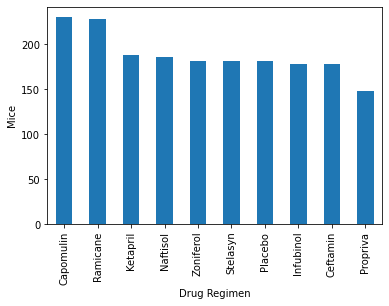

In [15]:
# Generate a bar plot 
# showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")

plt.show()


In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender = final_study_sheet["Sex"].value_counts()

mouse_gender

Male      958
Female    922
Name: Sex, dtype: int64

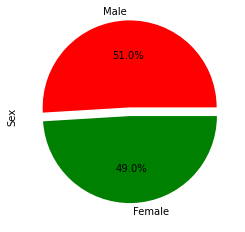

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male", "Female"]
colors = ["red", "Green"]
explode = (0.1,0)
plt.pie(mouse_gender, labels=sex, colors=colors, explode=explode, autopct="%1.1f%%")

plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_mouse = final_study_sheet.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint_mouse



Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

timepoint_tumor_vol = pd.merge (last_timepoint_mouse, final_study_sheet, on="Mouse ID", how="inner")
timepoint_tumor_vol


,Mouse ID,Timepoint_x,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,0,45.000000,0,Infubinol,Female,20,23
1,a203,45,5,48.508468,0,Infubinol,Female,20,23
2,a203,45,10,51.852437,1,Infubinol,Female,20,23
3,a203,45,15,52.777870,1,Infubinol,Female,20,23
4,a203,45,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...,...
1875,z969,45,25,63.145652,2,Naftisol,Male,9,30
1876,z969,45,30,65.841013,3,Naftisol,Male,9,30
1877,z969,45,35,69.176246,4,Naftisol,Male,9,30
1878,z969,45,40,70.314904,4,Naftisol,Male,9,30


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
?plt.boxplot

## Line and Scatter Plots

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_regimen = final_study_sheet.loc[final_study_sheet["Drug Regimen"] == "Capomulin"]

capomulin_regimen.describe()



,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,21.565217,40.675741,0.713043,13.456522,19.965217
std,14.384994,4.994774,0.848993,7.721423,2.732404
min,0.000000,23.343598,0.000000,1.000000,15.000000
25%,10.000000,37.685933,0.000000,7.000000,17.000000
50%,20.000000,41.557809,0.000000,16.500000,20.500000
75%,35.000000,45.000000,1.000000,20.000000,22.000000
max,45.000000,48.158209,3.000000,24.000000,25.000000


In [24]:
# Isolate a mouse ID number and get the stats for capomulin for j119, which is the mouse I have picked

capomulin_regimen_j119 = capomulin_regimen.loc[capomulin_regimen['Mouse ID'] == "j119"]
capomulin_regimen_j119

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1755,j119,0,45.000000,0,Capomulin,Female,7,23
1756,j119,5,45.838998,0,Capomulin,Female,7,23
1757,j119,10,46.425366,0,Capomulin,Female,7,23
1758,j119,15,47.322984,0,Capomulin,Female,7,23
1759,j119,20,48.158209,1,Capomulin,Female,7,23
1760,j119,25,42.417166,1,Capomulin,Female,7,23
1761,j119,30,43.013681,1,Capomulin,Female,7,23
1762,j119,35,43.765705,1,Capomulin,Female,7,23
1763,j119,40,44.585090,1,Capomulin,Female,7,23
1764,j119,45,38.125164,1,Capomulin,Female,7,23


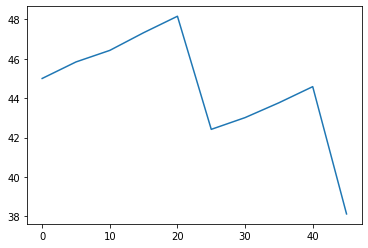

In [25]:
# Plot the mouse j119 that I have picked to sow the trend over time

plt.plot(capomulin_regimen_j119["Timepoint"], capomulin_regimen_j119["Tumor Volume (mm3)"])

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model activty 6 for correlation activity 8 for regression
# for mouse weight and average tumor volume for the Capomulin regimen



In [28]:
capomulin_mouse_weight = capomulin_regimen["Weight (g)"]
capomulin_avereage_tumor_vol = capomulin_regimen["Tumor Volume (mm3)"]
correlation = st.pearsonr(capomulin_mouse_weight, capomulin_avereage_tumor_vol)

print(f"The correlation between mouse weight and tumor volume is {correlation[0].round(3)}")

The correlation between mouse weight and tumor volume is 0.526


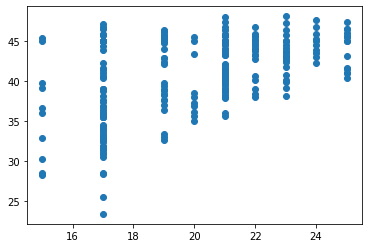

In [29]:
plt.scatter(capomulin_mouse_weight, capomulin_avereage_tumor_vol)
plt.show()

In [ ]:
?st.pearsonr